In [1]:
!pip install numpy pandas matplotlib nltk pyLDAvis==2.1.2

     |████████████████████████████████| 1.6 MB 4.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=efa2f8e467e7ff7985a07f97c186e9f69b9baa3532f2a79b009996892d1e2b96
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [2]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [3]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-09-05 13:22:41--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  15.5MB/s    in 1.0s    

2021-09-05 13:22:42 (15.5 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

#Upload file e import librerie

In [4]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from datetime import datetime, timedelta
import time


import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer 
import gensim

from pprint import pprint
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet
import spacy

import pyLDAvis
import pyLDAvis.gensim 

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


plt.style.use('classic')
%matplotlib inline

sns.set()
drive.mount('/gdrive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


Mounted at /gdrive


In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
stop_words = stopwords.words('english')
stop_words.extend(['co', 'k', 'c', 'h', 'x', 'r'])
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~...'s|``n'tl’'''
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words and word not in punc] for doc in texts]

In [7]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [9]:
df_tweets = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_polarized_2019.csv")
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets.set_index(['date']).sort_index()

df_tweets

,text,vader_polarity,vader_sentiment
date,,,
2019-05-06 02:25:41,wish token giveaway retweet and like this twee...,0.7351,1
2019-05-06 02:29:30,wish is a decentralized reward platform powere...,0.9451,1
2019-05-06 03:34:48,new tasks added to contest enter to win huge c...,0.8442,1
2019-05-06 05:29:29,achain congrats our community member artemiycr...,0.8625,1
2019-05-06 05:50:31,join on kingcuan our bot will automatically ma...,0.7506,1
...,...,...,...
2019-09-26 23:57:50,on september daps will make its long awaited t...,0.7884,1
2019-09-26 23:58:06,judge denies release of canadian man accused o...,-0.8316,0
2019-09-26 23:58:30,dutchsunset alexkjanssen alexcobb this message...,-0.4588,0


In [10]:
data = df_tweets.text.values.tolist()
data_words = list(sent_to_words(data))

In [11]:
print(data_words[:4])

[['wish', 'token', 'giveaway', 'retweet', 'and', 'like', 'this', 'tweet', 'follow', 'retweet', 'pinned', 'post', 'drop', 'eth', 'address', 'below', 'winners', 'announced', 'at', 'rts', 'bitcoin', 'waves', 'airdrop', 'wavesplatform', 'freetokens', 'giveaways', 'ethereum', 'stlblues', 'gameofthrones'], ['wish', 'is', 'decentralized', 'reward', 'platform', 'powered', 'by', 'wish', 'blockchain', 'name', 'wish', 'supply', 'symbol', 'wish', 'type', 'erc', 'get', 'wish', 'follow', 'retweet', 'comment', 'waves', 'address', 'airdrop', 'ico', 'eth', 'btc', 'ethereum', 'erc', 'entrepreneur', 'crypto', 'cryptocurrency'], ['new', 'tasks', 'added', 'to', 'contest', 'enter', 'to', 'win', 'huge', 'crypto', 'prizes', 'ends', 'may', 'th', 'sign', 'in', 'to', 'your', 'existing', 'account', 'at', 'co', 'oo', 'gm', 'click', 'sign', 'up', 'then', 'already', 'signed', 'up', 'and', 'enter', 'email', 'you', 'used', 'to', 'make', 'your', 'contest', 'account', 'crypto', 'giveaway', 'bitcoin'], ['achain', 'congra

In [12]:
data_words_nostops = remove_stopwords(data_words)

In [13]:
#data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [14]:
print(data_words_nostops[:1])

[['wish', 'token', 'giveaway', 'retweet', 'like', 'tweet', 'follow', 'retweet', 'pinned', 'post', 'drop', 'eth', 'address', 'winners', 'announced', 'rts', 'bitcoin', 'waves', 'airdrop', 'wavesplatform', 'freetokens', 'giveaways', 'ethereum', 'stlblues', 'gameofthrones']]


In [15]:
  filtered_sent=[] #essendo presenti stessi elementi con diversi nomi questi vengono rinominati 
  for s in data_words_nostops:
      sent=[]
      for w in s:
        if w=='btc' or w=='bitcoin':
            sent.append('BITCOIN')
        elif w=='eth' or w=='ethereum':
            sent.append('ETHEREUM')
        elif w=='doge' or w=='dogecoin':
            sent.append('DOGECOIN')    
        elif w=='bnb'or w=='binance':
            sent.append('BINANCE')  
        elif w=='amp':
            sent.append('AMP')  
        elif w=='xrp':
            sent.append('XRP')
        elif w=='nft':
            sent.append('APENFT')
        elif w=='ada':
            sent.append('CARDANO')   
        elif w=='bsc':
            sent.append('BOWSCOIN')
        elif w=='cryptocurrency' or w=='cryptocurrencies':
            sent.append('crypto')
        else:
          sent.append(w)
      filtered_sent.append(sent)

In [16]:
print(filtered_sent[:1])

[['wish', 'token', 'giveaway', 'retweet', 'like', 'tweet', 'follow', 'retweet', 'pinned', 'post', 'drop', 'ETHEREUM', 'address', 'winners', 'announced', 'rts', 'BITCOIN', 'waves', 'airdrop', 'wavesplatform', 'freetokens', 'giveaways', 'ETHEREUM', 'stlblues', 'gameofthrones']]


In [17]:
id2word = corpora.Dictionary(filtered_sent)
texts = filtered_sent
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)]]


In [18]:
id2word[0]

'BITCOIN'

In [19]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('BITCOIN', 1),
  ('ETHEREUM', 2),
  ('address', 1),
  ('airdrop', 1),
  ('announced', 1),
  ('drop', 1),
  ('follow', 1),
  ('freetokens', 1),
  ('gameofthrones', 1),
  ('giveaway', 1),
  ('giveaways', 1),
  ('like', 1),
  ('pinned', 1),
  ('post', 1),
  ('retweet', 2),
  ('rts', 1),
  ('stlblues', 1),
  ('token', 1),
  ('tweet', 1),
  ('waves', 1),
  ('wavesplatform', 1),
  ('winners', 1),
  ('wish', 1)]]

#Topic modeling

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=250,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
lda_model.save("/gdrive/My Drive/TextAnalytics/datasets/tweet.lda_model")
#lda_model = gensim.models.LdaModel.load("/gdrive/My Drive/TextAnalytics/datasets/tweet.lda_model")

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.055*"AMP" + 0.045*"earn" + 0.038*"win" + 0.018*"check" + 0.018*"wallet" + '
  '0.017*"participate" + 0.017*"open" + 0.015*"live" + 0.014*"easy" + '
  '0.014*"really"'),
 (1,
  '0.036*"eos" + 0.033*"link" + 0.027*"trx" + 0.027*"btt" + 0.026*"iost" + '
  '0.018*"ripple" + 0.014*"cryptotrading" + 0.011*"CARDANO" + 0.010*"panic" + '
  '0.009*"grow"'),
 (2,
  '0.377*"BITCOIN" + 0.027*"price" + 0.017*"time" + 0.014*"new" + '
  '0.014*"market" + 0.009*"bakkt" + 0.009*"us" + 0.008*"crash" + 0.007*"day" + '
  '0.007*"reward"'),
 (3,
  '0.073*"gt" + 0.041*"ETHEREUM" + 0.028*"blockchain" + 0.027*"usd" + '
  '0.025*"last" + 0.025*"ico" + 0.025*"volume" + 0.024*"project" + 0.023*"st" '
  '+ 0.018*"platform"'),
 (4,
  '0.040*"block" + 0.033*"mining" + 0.027*"value" + 0.019*"automatic" + '
  '0.016*"transactions" + 0.015*"supply" + 0.013*"jl" + 0.013*"issued" + '
  '0.013*"utc" + 0.012*"bytes"'),
 (5,
  '0.038*"BINANCE" + 0.033*"buy" + 0.030*"profit" + 0.026*"every" + '
  '0.025*"daily" + 0

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=filtered_sent, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.527196209049588

Coherence Score:  0.30537179423357175


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.280663  0.272264       1        1  18.449881
6      0.199653 -0.302428       2        1  14.721381
8     -0.055673 -0.154043       3        1  13.199429
7      0.090428 -0.036732       4        1  11.693576
9     -0.155589  0.088439       5        1   7.965396
0     -0.036555  0.019956       6        1   7.578005
5     -0.038787  0.021973       7        1   7.492374
3     -0.215276  0.016900       8        1   7.197777
4      0.014430  0.039172       9        1   6.646165
1     -0.083293  0.034498      10        1   5.056016, topic_info=                   Term           Freq  ...  logprob  loglift
0               BITCOIN  674196.000000  ...  30.0000  30.0000
25               crypto  203552.000000  ...  29.0000  29.0000
1              ETHEREUM   88385.000000  ...  28.0000  28.0000
118                  gt   51263.000000  ...  27.0000  27.0000
97                 free   62835.000000  ...  26.0000  26.0000
...                 ...            ...  ...      ...      ...
468858  unleashthebeast    2474.126790  ...  -5.2892   2.9830
481580   zerofeetrading    2470.413658  ...  -5.2907   2.9808
19962             topia    4310.710460  ...  -4.7340   2.8970
206923   futurestrading    2462.407202  ...  -5.2940   2.9766
518611        trontopia    3291.957756  ...  -5.0036   2.8543

[361 rows x 6 columns], token_table=        Topic      Freq            Term
term                                   
93          6  0.999975             AMP
264         7  0.999977         BINANCE
0           1  0.999999         BITCOIN
2679       10  0.999900         CARDANO
1500        5  0.999696        DOGECOIN
...       ...       ...             ...
2671        8  0.999810             zec
481580      1  0.002016  zerofeetrading
481580      3  0.000403  zerofeetrading
481580      6  0.000403  zerofeetrading
481580     10  0.996083  zerofeetrading

[377 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 9, 8, 10, 1, 6, 4, 5, 2])

#LDA Mallet

In [20]:
import os
from gensim.models.wrappers import LdaMallet

os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [ ]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word)

In [21]:
#ldamallet.save("/gdrive/My Drive/TextAnalytics/datasets/tweet_mallet_2019.ldamallet")
ldamallet = gensim.models.LdaModel.load("/gdrive/My Drive/TextAnalytics/datasets/tweet_mallet_2019.ldamallet")

In [ ]:
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=filtered_sent, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('blockchain', 0.026856883465746592),
   ('good', 0.022662188340036502),
   ('great', 0.022282975197966074),
   ('project', 0.017788458844165814),
   ('st', 0.01598672940807257),
   ('BITCOIN', 0.014457734547064461),
   ('crypto', 0.012808250781309836),
   ('team', 0.008468782165400443),
   ('platform', 0.007881282001946504),
   ('network', 0.006426074919814167)]),
 (1,
  [('gold', 0.009682278309166117),
   ('scam', 0.008533408200753045),
   ('read', 0.007478738052997637),
   ('news', 0.0069126147600256),
   ('facebook', 0.006385279686147896),
   ('libra', 0.006175638597233292),
   ('BITCOIN', 0.005869950489608913),
   ('fiat', 0.005773903470899139),
   ('china', 0.005466368305222649),
   ('currency', 0.005268733093646767)]),
 (2,
  [('BITCOIN', 0.25579893324019265),
   ('price', 0.03654145036015583),
   ('time', 0.03188669360070948),
   ('block', 0.024784067482753205),
   ('transactions', 0.010103680779883958),
   ('size', 0.010049045194361218),
   ('miner', 0.0100402644752593

## Finding the optimal number of topic for LDA

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=filtered_sent, start=3, limit=15, step=3)

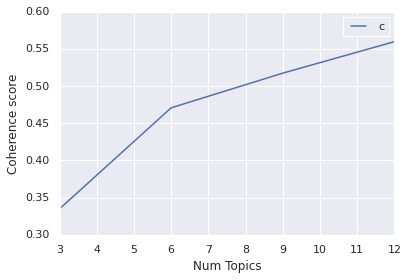

In [ ]:
limit=15; start=3; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3349
Num Topics = 6  has Coherence Value of 0.4707
Num Topics = 9  has Coherence Value of 0.5173
Num Topics = 12  has Coherence Value of 0.5596


In [ ]:
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.353*"BITCOIN" + 0.056*"price" + 0.049*"time" + 0.038*"block" + '
  '0.016*"transactions" + 0.015*"size" + 0.015*"miner" + 0.015*"supply" + '
  '0.014*"total" + 0.014*"number"'),
 (1,
  '0.031*"BITCOIN" + 0.013*"scam" + 0.010*"read" + 0.007*"million" + '
  '0.007*"ban" + 0.005*"man" + 0.005*"futures" + 0.005*"fraud" + '
  '0.005*"exchanges" + 0.005*"fake"'),
 (2,
  '0.014*"people" + 0.013*"gold" + 0.008*"libra" + 0.008*"fiat" + '
  '0.008*"network" + 0.008*"work" + 0.007*"apompliano" + 0.007*"system" + '
  '0.007*"facebook" + 0.007*"real"'),
 (3,
  '0.042*"ETHEREUM" + 0.034*"BINANCE" + 0.032*"XRP" + 0.024*"st" + '
  '0.022*"BITCOIN" + 0.022*"win" + 0.016*"litecoin" + 0.014*"ripple" + '
  '0.013*"bch" + 0.013*"trx"'),
 (4,
  '0.109*"BITCOIN" + 0.066*"crypto" + 0.047*"free" + 0.039*"buy" + '
  '0.031*"profit" + 0.029*"link" + 0.026*"airdrop" + 0.026*"join" + '
  '0.018*"sell" + 0.016*"future"'),
 (5,
  '0.092*"BITCOIN" + 0.025*"make" + 0.024*"trade" + 0.022*"mining" + '
  '0.022

## Dominant topic in each row

In [ ]:
def format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.2245,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",wish token giveaway retweet and like this twee...
1,1,3.0,0.1225,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",wish is a decentralized reward platform powere...
2,2,3.0,0.1785,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",new tasks added to contest enter to win huge c...
3,3,0.0,0.1448,"BITCOIN, price, time, block, transactions, siz...",achain congrats our community member artemiycr...
4,4,5.0,0.1490,"BITCOIN, make, trade, mining, free, today, tra...",join on kingcuan our bot will automatically ma...
5,5,4.0,0.1338,"BITCOIN, crypto, free, buy, profit, link, aird...",next btc long positions will be if any change ...
6,6,8.0,0.1575,"blockchain, crypto, great, good, project, team...",need to register a domain would you like to pa...
7,7,8.0,0.1579,"blockchain, crypto, great, good, project, team...",dent operator partner pldt smart world has sta...
8,8,7.0,0.1393,"money, BITCOIN, news, love, trading, business,...",engage yourself with bitcoin to marry success ...
9,9,3.0,0.1724,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",crypto family i have decided to give away hot ...


In [ ]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.2245,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",wish token giveaway retweet and like this twee...
1,1,3.0,0.1225,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",wish is a decentralized reward platform powere...
2,2,3.0,0.1785,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",new tasks added to contest enter to win huge c...
3,3,0.0,0.1448,"BITCOIN, price, time, block, transactions, siz...",achain congrats our community member artemiycr...
4,4,5.0,0.1490,"BITCOIN, make, trade, mining, free, today, tra...",join on kingcuan our bot will automatically ma...
...,...,...,...,...,...
518997,518997,3.0,0.1367,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",on september daps will make its long awaited t...
518998,518998,1.0,0.2335,"BITCOIN, scam, read, million, ban, man, future...",judge denies release of canadian man accused o...
518999,518999,10.0,0.1484,"people, market, shit, bsv, bad, hard, years, g...",dutchsunset alexkjanssen alexcobb this message...
519000,519000,2.0,0.1785,"people, gold, libra, fiat, network, work, apom...",pezosaso aaronlevi ltc apompliano changing the...


In [ ]:
df_dominant_topic.to_csv('/gdrive/My Drive/TextAnalytics/file_prova/df_dominant_topic_2019.csv')

## Most representative row for each topic

In [ ]:
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4523,"BITCOIN, price, time, block, transactions, siz...",twiceborn hb lgillon jimtaylorsays veteransalw...
1,1.0,0.6323,"BITCOIN, scam, read, million, ban, man, future...",papaporter vairton tom coleman yo yo kugey wan...
2,2.0,0.5302,"people, gold, libra, fiat, network, work, apom...",manuelpolavieja francispouliot hillebrandmax c...
3,3.0,0.4917,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",factom fct is fraud look at the price movement...
4,4.0,0.3811,"BITCOIN, crypto, free, buy, profit, link, aird...",be part of the future app store t co nnzzlfbw ...


In [ ]:
sent_topics_sorteddf_mallet.to_csv('/gdrive/My Drive/TextAnalytics/file_prova/df_representative_row_topic_2019.csv')

## Topic distribution

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,3.0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",31889.0,0.0614
1.0,3.0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",51201.0,0.0987
2.0,3.0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",71322.0,0.1374
3.0,0.0,"BITCOIN, price, time, block, transactions, siz...",37874.0,0.0730
4.0,5.0,"BITCOIN, make, trade, mining, free, today, tra...",28512.0,0.0549
...,...,...,...,...
518997.0,3.0,"ETHEREUM, BINANCE, XRP, st, BITCOIN, win, lite...",NaN,NaN
518998.0,1.0,"BITCOIN, scam, read, million, ban, man, future...",NaN,NaN
518999.0,10.0,"people, market, shit, bsv, bad, hard, years, g...",NaN,NaN
519000.0,2.0,"people, gold, libra, fiat, network, work, apom...",NaN,NaN


In [ ]:
df_dominant_topics.to_csv('/gdrive/My Drive/TextAnalytics/file_prova/df_topic_distribution_2019.csv')